In [23]:
# install packages
!pip install datasets[audio] librosa transformers

In [38]:
import librosa
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
from datasets import load_dataset
from transformers import pipeline
from IPython.display import Audio

In [39]:
# Load the dataset
voxpopuli_en = load_dataset("facebook/voxpopuli", split="train", name="en", streaming=True)

In [40]:
next(iter(voxpopuli_en))
next(iter(voxpopuli_en))
third_ex = next(iter(voxpopuli_en))
third_ex

# Alternative method
# voxpopuli_head = voxpopuli_en.take(3)
# third_ex = list(voxpopuli_head)[-1]
# third_ex

{'audio_id': '20180418-0900-PLENARY-3-en_20180418-08:50:36_17',
 'language': 0,
 'audio': {'path': 'train_part_0/20180418-0900-PLENARY-3-en_20180418-08:50:36_17.wav',
  'array': array([-0.00030518,  0.00119019,  0.00506592, ..., -0.00036621,
         -0.00027466, -0.00018311]),
  'sampling_rate': 16000},
 'raw_text': 'If you do not address this problem, the ground is there for populist nationalist forces to go on growing all over Europe.',
 'normalized_text': 'if you do not address this problem the ground is there for populist nationalist forces to go on growing all over europe.',
 'gender': 'female',
 'speaker_id': '124737',
 'is_gold_transcript': True,
 'accent': 'None'}

In [41]:
# Audio
Audio(third_ex["audio"]["array"], rate=third_ex["audio"]["sampling_rate"])

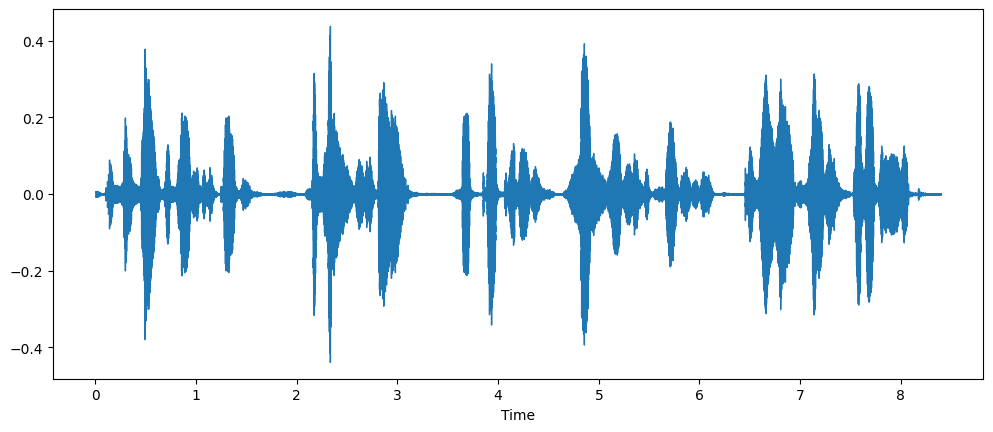

In [42]:
# Waveform
array = third_ex["audio"]["array"]
sampling_rate = third_ex["audio"]["sampling_rate"]

plt.figure().set_figwidth(12)
librosa.display.waveshow(array, sr=sampling_rate)

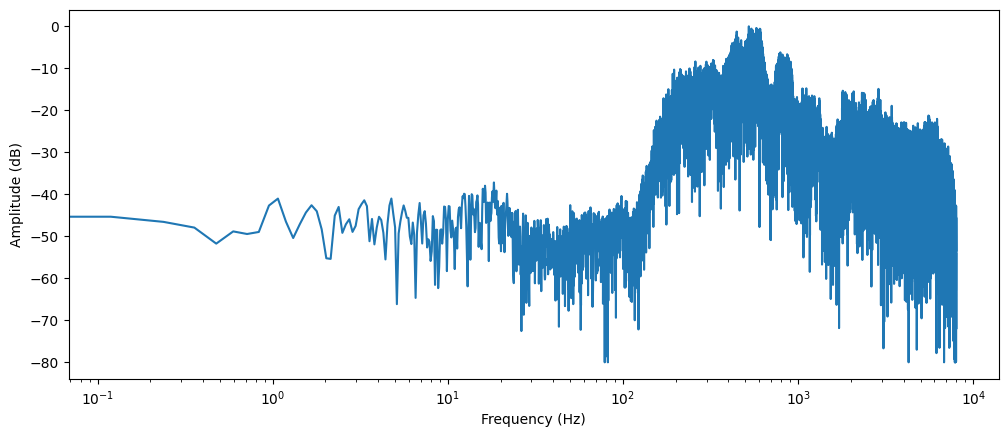

In [43]:
# Frequency Spectrum
dft_input = array

# calculate the DFT
window = np.hanning(len(dft_input))
windowed_input = dft_input * window
dft = np.fft.rfft(windowed_input)

# get the amplitude spectrum in decibels
amplitude = np.abs(dft)
amplitude_db = librosa.amplitude_to_db(amplitude, ref=np.max)

# get the frequency bins
frequency = librosa.fft_frequencies(sr=sampling_rate, n_fft=len(dft_input))

plt.figure().set_figwidth(12)
plt.plot(frequency, amplitude_db)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (dB)")
plt.xscale("log")

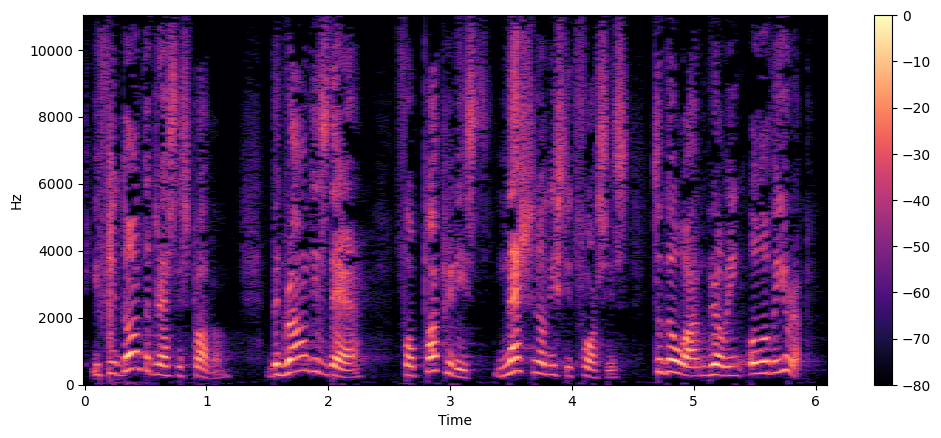

In [44]:
# Spectrogram
D = librosa.stft(array)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_db, x_axis="time", y_axis="hz")
plt.colorbar()

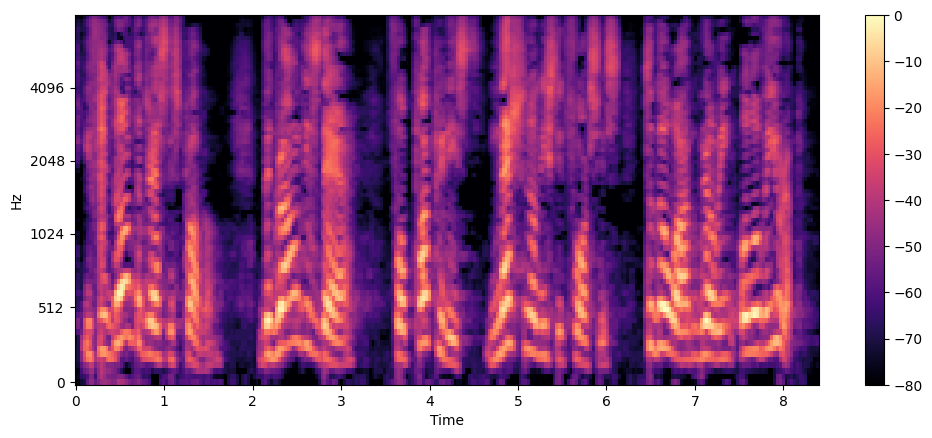

In [45]:
# Mel Spectogram
S = librosa.feature.melspectrogram(y=array, sr=sampling_rate, n_mels=80)
S_dB = librosa.power_to_db(S, ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_dB, x_axis="time", y_axis="mel", sr=sampling_rate)
plt.colorbar()

In [46]:
# Instantiate the pipeline
asr = pipeline("automatic-speech-recognition", model="openai/whisper-tiny")
predicted_text = asr(third_ex["audio"]["array"])

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [48]:
# Compare the results
print(predicted_text['text'])
print(third_ex['raw_text'])

 If you don't address this problem, the ground is there for populist nationalistic forces to go on growing all over Europe.
If you do not address this problem, the ground is there for populist nationalist forces to go on growing all over Europe.
